Do the following exercise.

1) Clone https://github.com/adamnguyenitvn/bigdata_labs_2019

2) Open sales.ipynb

3) Make a copy of sales.ipynb, name it with your student ID

4) Do the exercise

5) Write your github username here http://socrates.io/#KFCbqAn  . We will add you to the repos for push permission

6) Check your email for github invitation

7) Push your Jupyter notebook to github

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [181]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [182]:
df.shape

(29922, 6)

In [183]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [184]:
df['ordered_at'] = pd.to_datetime(df['ordered_at'])

In [185]:
def to_float(num_with_currency):
    return float(num_with_currency[1:])

df['price'] = df['price'].apply(to_float)
df['line_total'] = df['line_total'].apply(to_float)

In [186]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [187]:
df.drop_duplicates(inplace=True)

In [188]:
df[df.duplicated()].shape[0]

0

In [189]:
df.dropna(inplace=True)

In [190]:
df.isnull().sum()

order_id      0
name          0
ordered_at    0
price         0
quantity      0
line_total    0
dtype: int64

In [191]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total


#### Sanity check for value ranges and to check assumptions

In [192]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

28

In [193]:
df[df['line_total'] < 0].shape[0]

279

#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [194]:
df['line_total'] = df['price'] * df['quantity']

In [195]:
df['line_total']
# df = df[df['line_total'] < 0]

0        10.5
1         3.5
2         5.0
4         3.5
5         3.0
7         1.5
8         4.5
9         5.0
10        2.5
11        3.0
12        9.0
13        4.5
14        5.0
15        3.0
16        8.0
17        0.5
18        2.5
19        6.0
20        3.0
21        4.0
22        7.0
23        7.5
24       10.5
25        3.0
26        5.0
28       -3.0
29        5.0
30        2.5
31        1.0
32        7.5
         ... 
29789     3.5
29790     7.0
29791     4.0
29792     8.0
29793    12.0
29794     1.5
29795     8.0
29796     1.5
29797     1.5
29798     2.5
29799    12.0
29800     3.5
29801     1.5
29803     3.5
29805     2.5
29806     4.5
29807     7.0
29808     0.5
29810     1.5
29811     5.0
29812     7.5
29813    10.5
29814     3.5
29815     4.0
29816     7.0
29817    12.0
29818     7.5
29819     3.0
29820     3.5
29821     5.0
Name: line_total, Length: 27903, dtype: float64

In [196]:
df.describe()

,order_id,price,quantity,line_total
count,27903.000000,27903.000000,27903.000000,27903.000000
mean,14992.452675,2.461044,2.001039,4.925384
std,2889.735987,1.173305,0.819074,3.253986
min,10000.000000,-4.000000,1.000000,-12.000000
25%,12496.000000,1.500000,1.000000,2.500000
50%,14972.000000,2.500000,2.000000,4.000000
75%,17508.500000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


#### TODO: Get value between "" in name and put it in category column

In [197]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0


#### Analysis, finally!

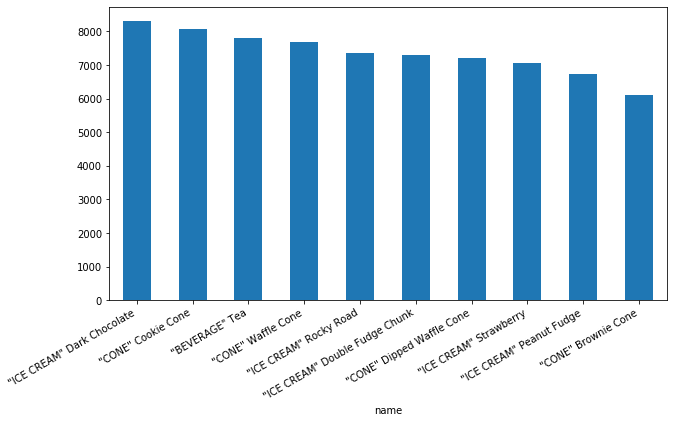

In [198]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()